# Customer Churn Analysis

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.



customerID: Customer ID

genderCustomer: gender (female, male)

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

PartnerWhether: the customer has a partner or not (Yes, No)

Dependents: Whether the customer has dependents or not (Yes, No)

tenure: Number of months the customer has stayed with the company

PhoneService: Whether the customer has a phone service or not (Yes, No)

MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract: The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

Churn: Whether the customer churned or not (Yes or No)

In [1]:
#Loading the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Loading the dataset which is separated by the comma(,)
df=pd.read_csv("dataset/Telecom_customer_churn.csv",sep=",")

In [5]:
#Lets see first 5 rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#Lets see the shape of the data
print('The dataset have Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

The dataset have Rows: 7043 Columns: 21


In [7]:
#lets check the null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We can see in the entire dataset there are no null values

In [8]:
#Lets check the datatypes of columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Here we can see that Total chargers is in object dataframe which should be in float dtype.

In [9]:
#Lets do the conversion of 'Total Charges' column to float type
df["TotalCharges"]=df["TotalCharges"].str.strip()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [10]:
#Lets check the datatypes again
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now we can see that datatype has been changed to float for 'TotalCharges'

In [11]:
#lets chcek the null vaues
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

But above conversion generated null values in TotalCharges column

In [12]:
#lets chcek the rows where it raised null values
df.loc[df["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
#imputing the genrated null values with mean in "TotalCharges"
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [14]:
#Lets check again null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Hence imputation is successfull no null value present in the dataset

In [15]:
#Also lets delete "customerID" column as it will not add any significance to the model building process
df.drop(columns=["customerID"],inplace=True)

In [16]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [18]:
# Checking the counts of label categories
churn = df['Churn'].value_counts(normalize=True)
round(churn * 100, 2).astype('str') + ' %'

No     73.46 %
Yes    26.54 %
Name: Churn, dtype: object

The dataset is unbalanced, as the dependent feature 'churn' contains 73.96% values have churn with No and 26.54% values have churn with Yes.

## Graphical EDA


### Univariate Analysis:

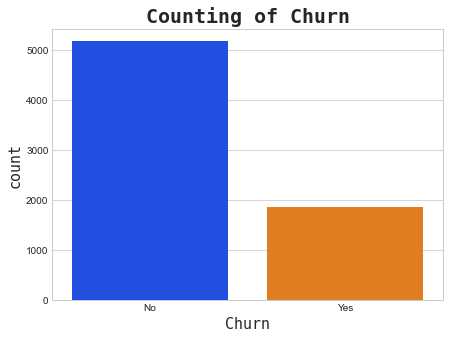

In [19]:
# Creating a barplot for 'Churn'
churn = df['Churn'].value_counts()
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(churn.index, churn.values, palette='bright')
plt.title('Counting of Churn', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Churn', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see that the data is highly imbalanced.

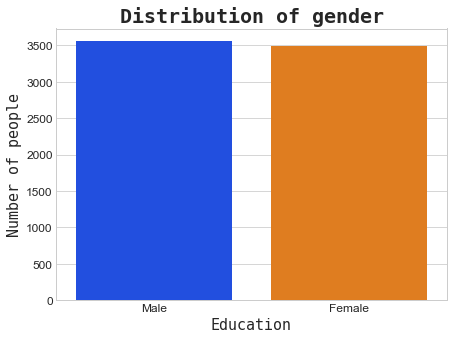

In [20]:
#lets see the churn on the basis of gender of the people 
gender = df['gender'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(gender.index,gender.values,  palette='bright')
plt.title('Distribution of gender', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

So both the gender are equal.

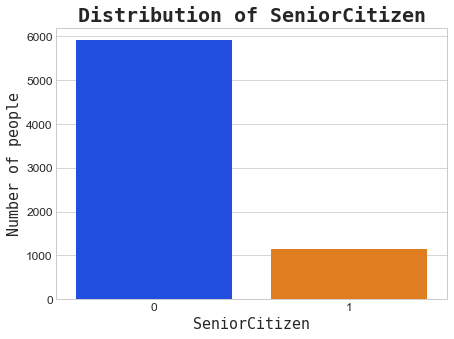

In [21]:
#lets see the churn on the basis of SeniorCitizen of the people 
senior = df['SeniorCitizen'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(senior.index,senior.values,  palette='bright')
plt.title('Distribution of SeniorCitizen', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('SeniorCitizen', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here we can see that very less senior citizen are present in the dataset.

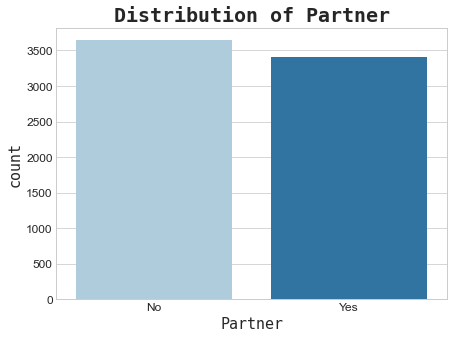

In [22]:
#lets see the churn on the basis of Partner of the people 
partner = df['Partner'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(partner.index,partner.values,  palette='Paired')
plt.title('Distribution of Partner', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Partner', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here the maximum people are those who have no partners.

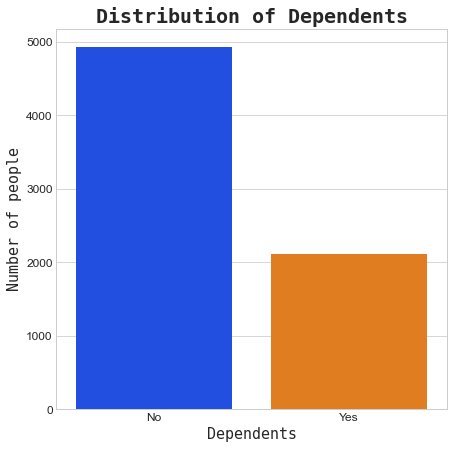

In [23]:
#lets see the churn on the basis of Dependents 
depend = df['Dependents'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 7))
sns.barplot(depend.index,depend.values,  palette='bright')
plt.title('Distribution of Dependents', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Dependents', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()


Here we can see that maximum are customers are those who are not dependents on others.

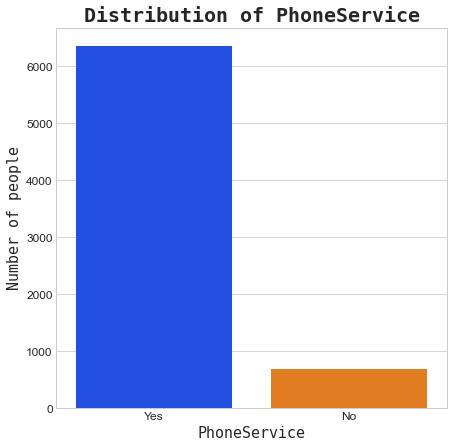

In [24]:
#lets see the churn on the basis of PhoneService 
phone = df['PhoneService'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 7))
sns.barplot(phone.index,phone.values,  palette='bright')
plt.title('Distribution of PhoneService', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('PhoneService', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here we can observe that the maximum customers are using the phone services.

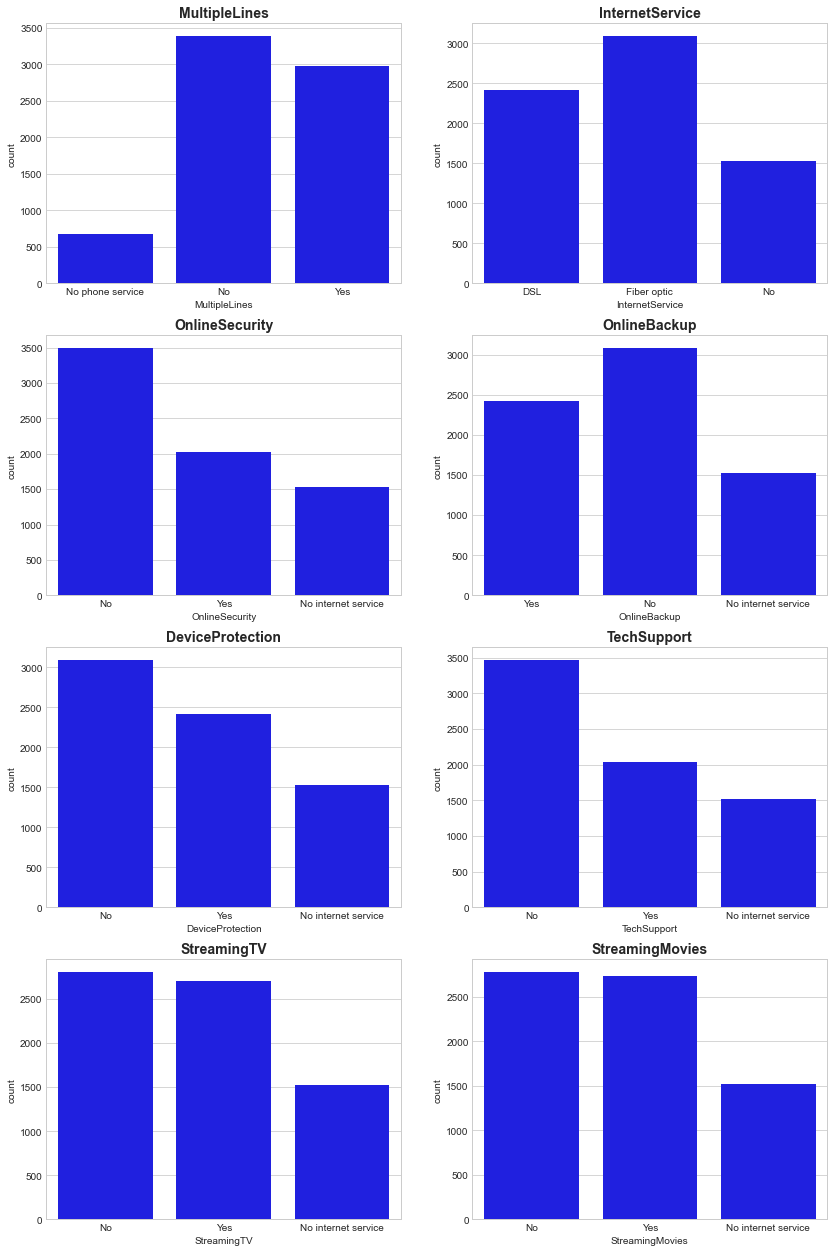

In [25]:
col=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']
a = 4  # number of rows
b = 2 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in col:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),fontsize=14,fontweight='bold')
    plt.xlabel(i)
    sns.countplot(df[i],color='blue')
    c = c + 1

plt.show()

Most of the sample have phone service with a single phone line. Fiber optic internet connection is more popular than DSL internet service, and each online service has a minority of users.

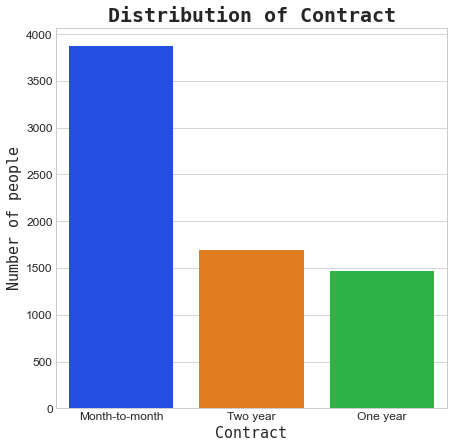

In [26]:
#lets see the churn on the basis of Contract 
contract = df['Contract'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 7))
sns.barplot(contract.index,contract.values,  palette='bright')
plt.title('Distribution of Contract', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Contract', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here we can see that most of the customer have the Month-to-Month contract with the Telecom industry.

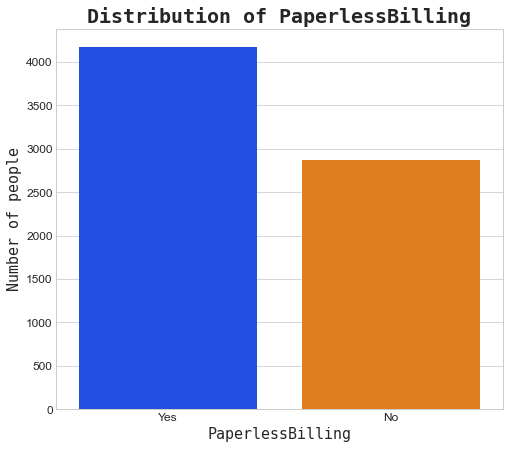

In [27]:
#lets see the churn on the basis of PaperlessBilling 
pprb = df['PaperlessBilling'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 7))
sns.barplot(pprb.index,pprb.values,  palette='bright')
plt.title('Distribution of PaperlessBilling', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('PaperlessBilling', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

The maximum number of customers are those who are using the Paper less Billing Method.

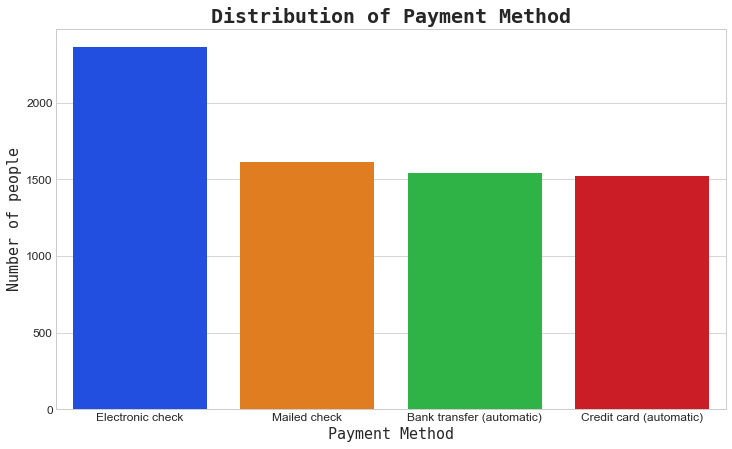

In [28]:
#lets see the churn on the basis of PaymentMethod 
pm = df['PaymentMethod'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 7))
sns.barplot(pm.index,pm.values,  palette='bright')
plt.title('Distribution of Payment Method', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Payment Method', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here we can observe that the customer’s payment method are mainly with the electronic check.

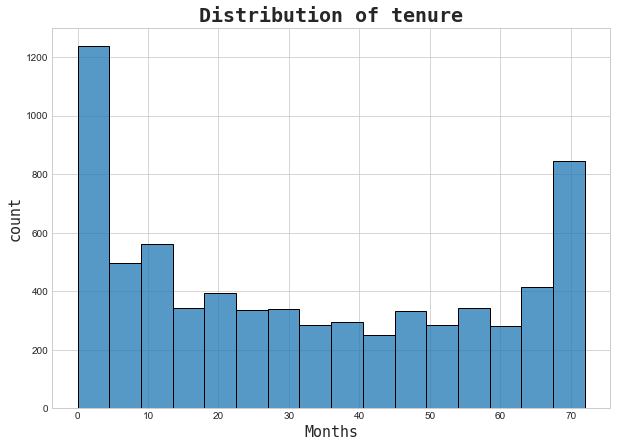

In [29]:
# Creating a histogram plot for 'tenure'
tenure = df['tenure'].value_counts()

plt.figure(figsize=(10, 7))
sns.histplot(df['tenure'])
plt.title('Distribution of tenure', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Months', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can observe that the tenure variable is stacked at the tails, so a large proportin of customers have either been had the shortest (1 month) or longest (72 month) tenure.

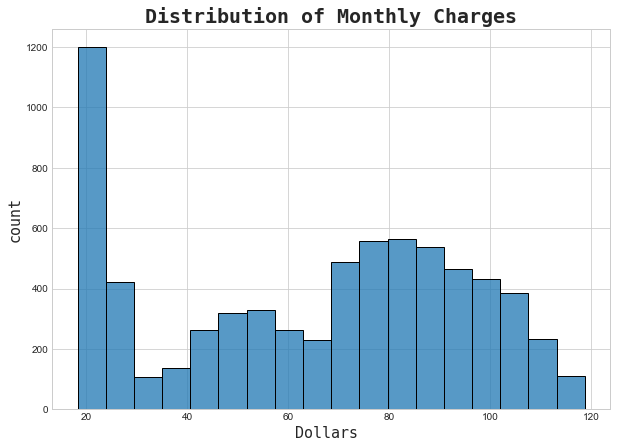

In [30]:
# Creating a histogram plot for 'MonthlyCharges'
MonthlyCharges = df['MonthlyCharges'].value_counts()

plt.figure(figsize=(10, 7))
sns.histplot(df['MonthlyCharges'])
plt.title('Distribution of Monthly Charges', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Dollars ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see that the maximum customer charged 20and30 dollars Monthly.

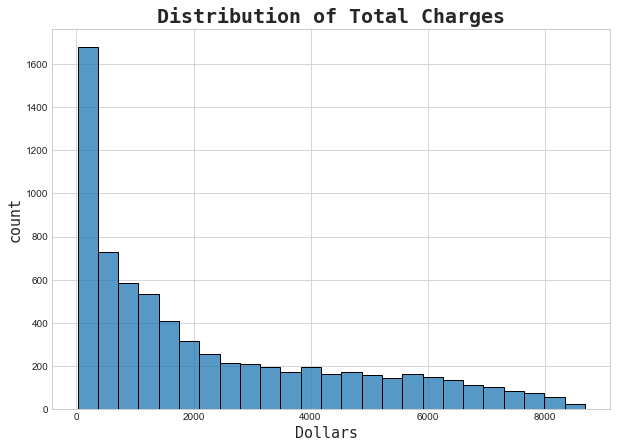

In [31]:
# Creating a histogram plot for 'TotalCharges'
TotalCharges = df['TotalCharges'].value_counts()

plt.figure(figsize=(10, 7))
sns.histplot(df['TotalCharges'])
plt.title('Distribution of Total Charges', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Dollars ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see that the TotalCharges variable is positively skewed with a large number of customers are near the lower amounts.

## Bivariate Analysis

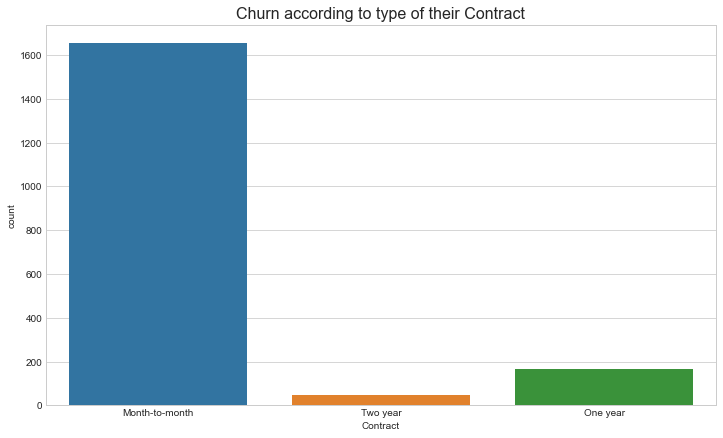

In [32]:
#Which "Contract" type of cutsomers are churning more
plt.figure(figsize=(12, 7))
sns.countplot(x="Contract",data=df.loc[df["Churn"]=="Yes"])
plt.title("Churn according to type of their Contract", fontsize = 16)
plt.show()

Here we can see that the Customers who have churned are mostly having contract of "Month to Month".

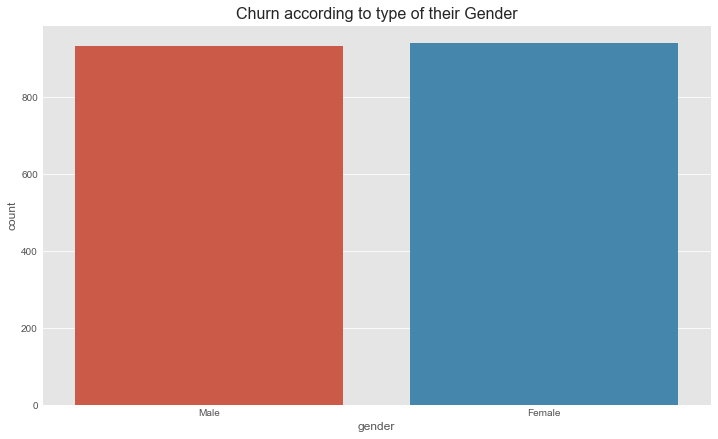

In [33]:
#Lets see the churn on the basis of gender
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
sns.countplot(x="gender",data=df.loc[df["Churn"]=="Yes"])
plt.title("Churn according to type of their Gender", fontsize = 16)
plt.show()

Here we can see that the both type of genders are equally churned.

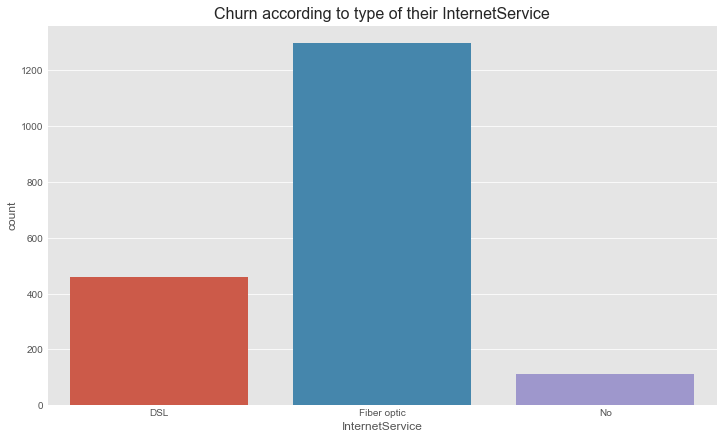

In [34]:
#Lets count the customers who the churned on the basis of InternetService
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
sns.countplot(x="InternetService",data=df.loc[df["Churn"]=="Yes"])
plt.title("Churn according to type of their InternetService", fontsize = 16)
plt.show()

High amount of people i.e more than 1200 who churned are having InternetService of Fiber optic type So may be this type of service is bad and needs to be focussed on.

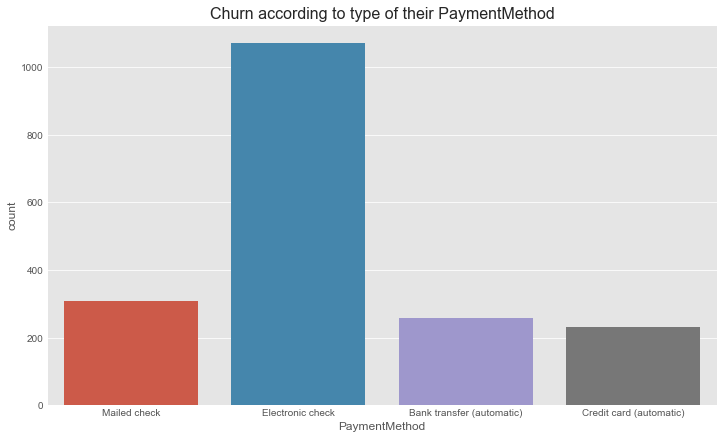

In [35]:
#Lets count the customers who the churned on the basis of PaymentMethod
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
sns.countplot(x="PaymentMethod",data=df.loc[df["Churn"]=="Yes"])
plt.title("Churn according to type of their PaymentMethod", fontsize = 16)
plt.show()

Here we obseved churn is higher around 1100 i.e more than 50% of churn where customers are using "Electronic check". We can say this mode of payment has multiple issues because of which customers are dissatisfied

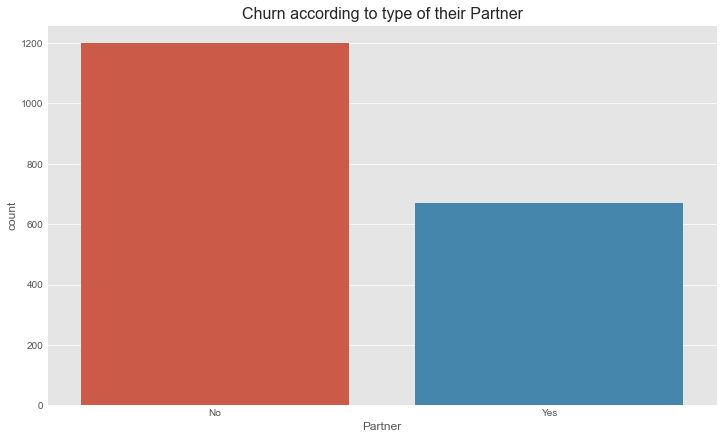

In [36]:
#Lets count the customers who the churned on the basis of Partner
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
sns.countplot(x="Partner",data=df.loc[df["Churn"]=="Yes"])
plt.title("Churn according to type of their Partner", fontsize = 16)
plt.show()

Churn in unmarried persons are more compared to married eventhough both type of customers almost equally exist in dataset.

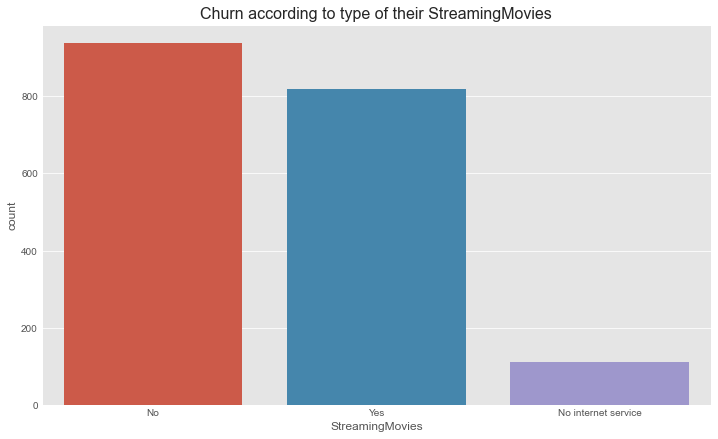

In [37]:
#Lets count the customers who the churned on the basis of StreamingMovies
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
sns.countplot(x="StreamingMovies",data=df.loc[df["Churn"]=="Yes"])
plt.title("Churn according to type of their StreamingMovies", fontsize = 16)
plt.show()

Maximum customer who churn are those who are not very found of Streaming movies.

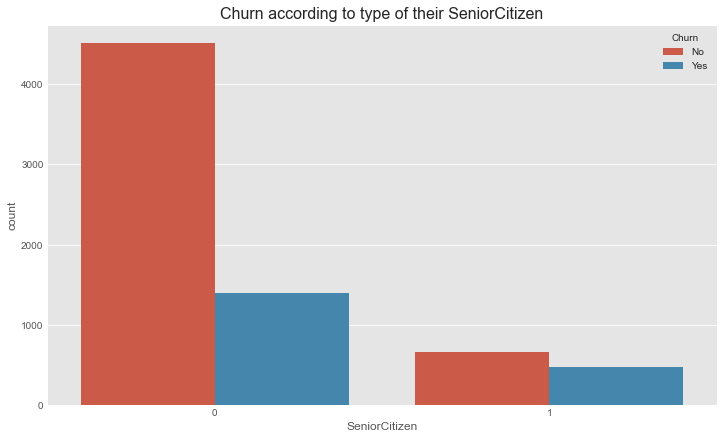

In [38]:
#Lets count the customers who the churned on the basis of SeniorCitizen
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
sns.countplot(x="SeniorCitizen",hue='Churn',data = df)
plt.title("Churn according to type of their SeniorCitizen", fontsize = 16)
plt.show()

Here most of the Most of the senior citizens churned.

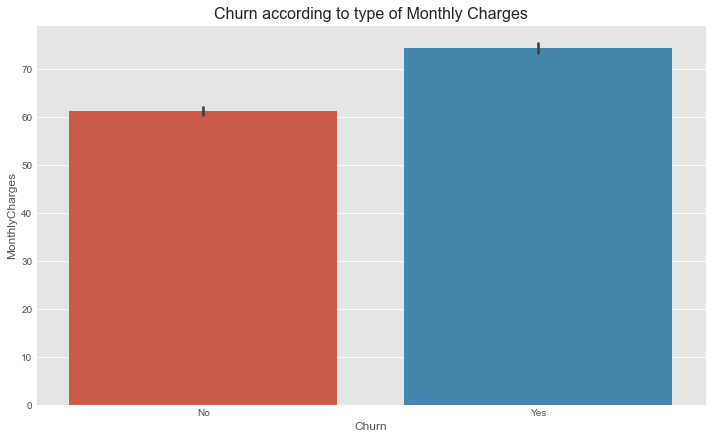

In [39]:
#Lets count the average montly charges af the customers who chunrned
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
sns.barplot(x="Churn",y='MonthlyCharges',data = df)
plt.title("Churn according to type of Monthly Charges", fontsize = 16)
plt.show()

Customer with high monthly charges are more churned.

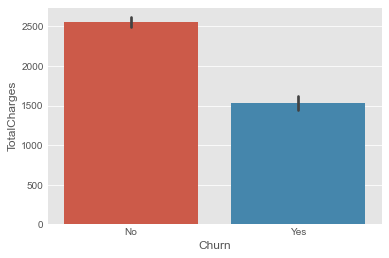

In [40]:
#lets check the average total charges af the customers who churned compared to who didn't
sns.barplot(x="Churn",y="TotalCharges",data=df)
plt.show()

Here we can see that the customers who didnt chuned has averge total charges more.

## Multivariate Analysis

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

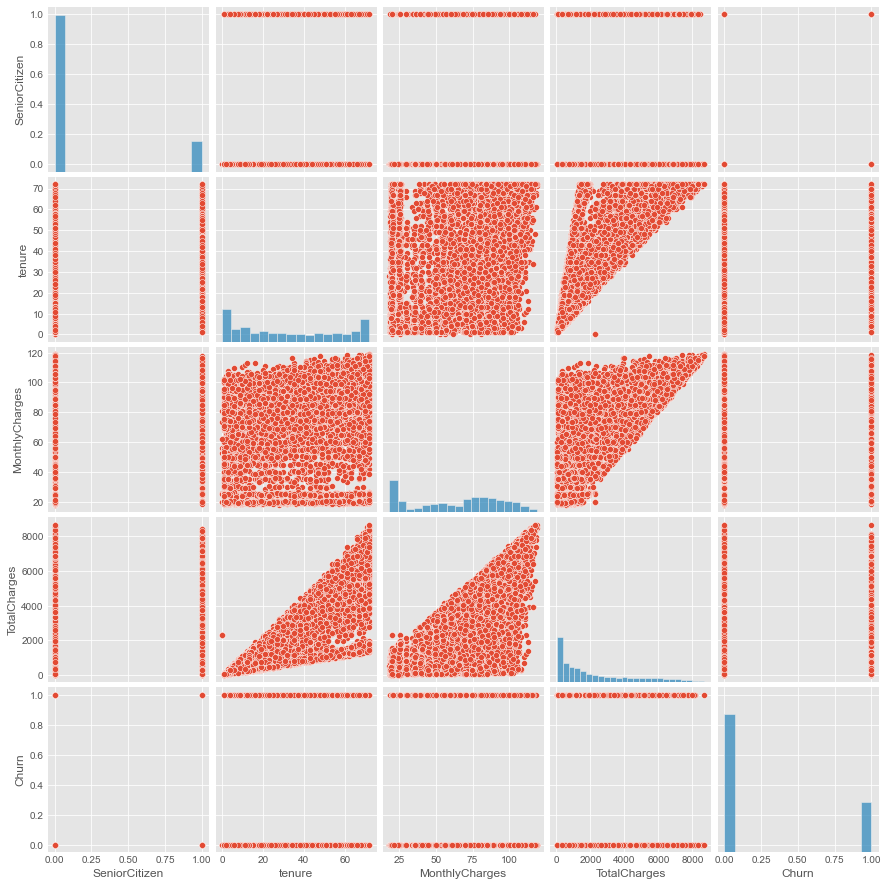

In [42]:
# Creating a pairplot of dataset
sns.pairplot(df)
plt.show()


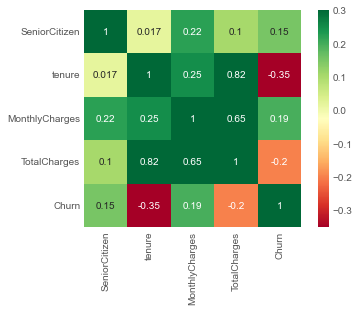

In [43]:
corr = df.corr()
sns.heatmap(corr, vmax=.3, square=True,annot=True, cmap='RdYlGn')
plt.show()

From the correlation heatmap, we can see that the dependent feature 'churn' is positive correlated with the Monthly charges and Senior Citizen and Negatively correlated with the Tenure.

## Data Preprocessing

In [44]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [45]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
Churn             1.063031
dtype: float64

In [46]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution

skew=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.cbrt(df[col])

In [47]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
Churn             1.063031
dtype: float64

Almost from every column skewness is removed. Some skewness are the features of the data.

## Label Encoding

In [48]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [49]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,3.102045,0
1,1,0.0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,12.362766,0
2,1,0.0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,4.764407,1
3,1,0.0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,12.255516,0
4,0,0.0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,5.332704,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0.0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,12.579230,0
7039,0,0.0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,19.454331,0
7040,0,0.0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,7.023391,0
7041,1,1.0,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,6.743066,1


## Feature Selection:

In [50]:
#Lets divide the dataset into input and output
X = df.drop('Churn', axis=1)
Y = df[['Churn']]

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)
selector.fit(X, Y)
feature_imp = selector.feature_importances_

In [52]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 3.78
1 2.56
2 3.01
3 2.45
4 14.22
5 0.68
6 2.72
7 3.75
8 4.48
9 3.2
10 2.81
11 4.43
12 2.32
13 2.35
14 8.28
15 3.0
16 6.48
17 13.67
18 15.81


In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   float64
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


Dropping Unnecessary columns , as these columns does not impact the output

In [54]:
X = X.drop([ 'PhoneService', 'MultipleLines', 'StreamingTV', 'SeniorCitizen'], axis=1)

In [55]:
from sklearn.preprocessing import StandardScaler

for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))
    
x=pd.DataFrame(X,columns=X.columns)
x.head()

,gender,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,1.034530,-0.654012,-1.277445,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.966622,-0.654012,0.066327,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.966622,-0.654012,-1.236724,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.966622,-0.654012,0.514251,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.966622,-0.654012,-1.236724,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716


## Fixing imbalanced dataset using Oversampling

In [56]:
from imblearn.over_sampling import SMOTE
sme = SMOTE(random_state=42)
sme.fit(x, Y)
X_resampled, Y_resampled = sme.fit_resample(x, Y)

In [57]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

Churn
0        50.0 %
1        50.0 %
dtype: object

## Model Training:

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [59]:
x_train, x_test, y_train, y_test = train_test_split( X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [60]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (8278, 15)
X_test shape: (2070, 15)
Y_train shape: (8278, 1)
Y_test shape: (2070, 1)


In [61]:
lg=LogisticRegression()
gnb=GaussianNB()
sv=SVC()
rf=RandomForestClassifier(n_estimators=100)
ada = AdaBoostClassifier(n_estimators=100)
knn=KNeighborsClassifier()
dtc= DecisionTreeClassifier()

In [62]:
model = [lg,gnb,sv,rf,ada,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of ",m,"is:")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of  LogisticRegression() is:
0.7835748792270532
[[769 252]
 [196 853]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1021
           1       0.77      0.81      0.79      1049

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



Accuracy score of  GaussianNB() is:
0.7695652173913043
[[747 274]
 [203 846]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1021
           1       0.76      0.81      0.78      1049

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



Accuracy score of  SVC() is:
0.8106280193236715
[[787 234]
 [158 891]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      102

RandomForestClassifier Model gives the highest Accuracy of 0.86 . Hence we will used it for predictions.

## Hyperparameter Tuning

In [63]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 40, stop = 150, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 150, num = 10)]
max_depth.append(None)

criterion= ['gini', 'entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion}

rfc = RandomForestClassifier()
rand_search = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid,n_jobs=-1)

rand_search.fit(x_train, y_train)

print(rand_search.best_estimator_)
print(rand_search.best_score_)

RandomForestClassifier(criterion='entropy', max_depth=76, n_estimators=137)
0.8446495030430405


## Final modelling and evaluating using Best Parameteres:

In [64]:
RFC = RandomForestClassifier(max_depth=76,criterion='entropy',
                             n_estimators=101,max_features='sqrt')
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc_sc= accuracy_score(y_test,pred)
print("accuracy score :",acc_sc*100)

accuracy score : 85.89371980676329


In [65]:
#Calculating the scores of different parameters
score=cross_val_score(RFC,X_resampled,Y_resampled,cv=5,scoring='accuracy').mean()
print('Cross_val_score: ',score*100)
print('Mean Score: ',score.mean()*100)
print('STD Score: ',score.std())

Cross_val_score:  84.90623256118035
Mean Score:  84.90623256118035
STD Score:  0.0


In [66]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print("Confusion matrix \n",confusion_matrix(y_test,pred))
print("f1 score is : ",f1_score(y_test,pred))
print("classification report \n",classification_report(y_test,pred))
print("AUC ROC Score: ",roc_auc_score(y_test,pred))

Confusion matrix 
 [[862 159]
 [133 916]]
f1 score is :  0.8625235404896422
classification report 
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      1021
           1       0.85      0.87      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

AUC ROC Score:  0.8587414533126554


## ROC curve:

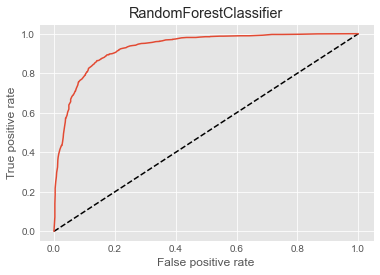

0.8587414533126554

In [67]:
y_pred_prob = RFC.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score=roc_auc_score(y_test,RFC.predict(x_test))
auc_score

Here the auc roc score is 0.858 which is very good.

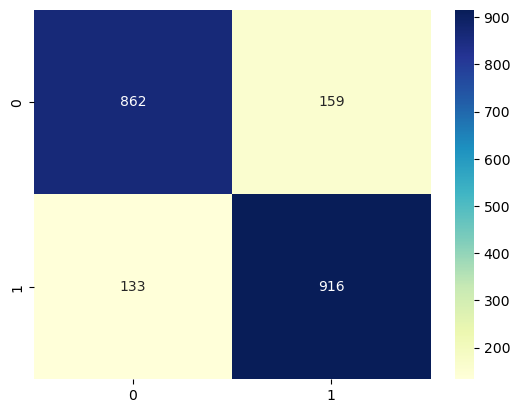

In [68]:
cm = confusion_matrix(y_test, pred)
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

Here we can see that True Positive and are very high and False negative are very low i.e.133

In [69]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1021
           1       0.85      0.87      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



After the model evaluation , we get the precision and recall for both the target variable as 0.87 and 0.84. The f1- score of the model is 0.86. The ROC curve gave us the AUC score which is 0.86. Model evaluation gives the results that the prediction is very accurate.

In [70]:
#Applying model on the test set
y_prediction=RFC.predict(x_test)

In [71]:
#lets make the dataframe for price_pred
price_pred=pd.DataFrame(y_prediction,columns=["Churn"])

In [72]:
price_pred.head(10)

,Churn
0,1
1,0
2,0
3,1
4,1
5,1
6,0
7,1
8,1
9,0


In [73]:
#Lets save the submission to csv
price_pred.to_csv("Telecom_churn_predictions.csv",index=False)

## Saving the model

In [74]:
#saving the model
model=joblib.dump(RFC,'Telecom_churn.obj')

### Conclusion:

In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier, Adaboost classifier and Gaussian Naive Bayes

A hyperparameter tuned random forest classifier gives the highest accuracy score of 85.87 and Auc roc score of 0.86.